In [1]:
#!g1.1
%pip install youtokentome

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
!git clone https://github.com/logpai/loghub.git

In [1]:
import os

lines_count = 0

# Just samples. Raw files are there: https://zenodo.org/record/3227177#.YaJLZ9DP2Uk
with open('concat.log', 'w') as log:
    for root, subdirs, files in os.walk("loghub"):
        for file in files:
            if file.endswith('log'):
                path = os.path.join(root, file)
                print(f"Found {path}. Appending to log...")
                with open(path, 'r') as child:
                    lines = child.readlines()
                    lines_count += len(lines)
                    log.writelines(lines)

print(f"Written {lines_count} lines to log file")

Found loghub/Andriod/Android_2k.log. Appending to log...
Found loghub/Apache/Apache_2k.log. Appending to log...
Found loghub/BGL/BGL_2k.log. Appending to log...
Found loghub/HDFS/HDFS_2k.log. Appending to log...
Found loghub/HPC/HPC_2k.log. Appending to log...
Found loghub/Hadoop/Hadoop_2k.log. Appending to log...
Found loghub/HealthApp/HealthApp_2k.log. Appending to log...
Found loghub/Linux/Linux_2k.log. Appending to log...
Found loghub/Mac/Mac_2k.log. Appending to log...
Found loghub/OpenSSH/SSH_2k.log. Appending to log...
Found loghub/OpenStack/OpenStack_2k.log. Appending to log...
Found loghub/Proxifier/Proxifier_2k.log. Appending to log...
Found loghub/Spark/Spark_2k.log. Appending to log...
Found loghub/Thunderbird/Thunderbird_2k.log. Appending to log...
Found loghub/Windows/Windows_2k.log. Appending to log...
Found loghub/Zookeeper/Zookeeper_2k.log. Appending to log...
Written 32000 lines to log file


In [1]:
#!g1.1

import youtokentome as yttm

train_data_path = "concat.log"
model_path = "example.model"

yttm.BPE.train(data=train_data_path, vocab_size=5000, model=model_path)

bpe = yttm.BPE(model=model_path)

test_text = "03-17 16:13:38.954  2227  2227 I PhoneStatusBar: setSystemUiVisibility vis=40000500 mask=ffffffff oldVal=508 newVal=40000500 diff=40000008 fullscreenStackVis=0 dockedStackVis=0, fullscreenStackBounds=Rect(0, 0 - 720, 1280), dockedStackBounds=Rect(0, 0 - 0, 0)"

encoded_id = bpe.encode([test_text], output_type=yttm.OutputType.ID)
encoded_subword = bpe.encode([test_text], output_type=yttm.OutputType.SUBWORD)

print(encoded_id)
print(encoded_subword)
print(bpe.decode(encoded_id))

[[461, 1684, 1589, 2094, 188, 618, 618, 120, 1510, 2442, 2399, 49, 1809, 2091, 49, 4668, 4668, 2268, 1746, 3262, 2605, 2443, 49, 1721, 4716, 2446, 2445, 2448, 109, 113, 827, 4278, 311, 239, 3260, 2447, 109, 113, 1400, 1804]]
[['▁03-17', '▁16:13', ':38', '.9', '54', '▁2227', '▁2227', '▁I', '▁PhoneStatusBar:', '▁setSystemUiVisibility', '▁vis', '=', '40000500', '▁mask', '=', 'ffff', 'ffff', '▁old', 'Val=', '508', '▁newVal=40000500', '▁diff', '=', '40000', '008', '▁fullscreenStackVis=0', '▁dockedStackVis=0,', '▁fullscreenStackBounds=Rect(0,', '▁0', '▁-', '▁7', '20,', '▁12', '80', '),', '▁dockedStackBounds=Rect(0,', '▁0', '▁-', '▁0,', '▁0)']]
['03-17 16:13:38.954 2227 2227 I PhoneStatusBar: setSystemUiVisibility vis=40000500 mask=ffffffff oldVal=508 newVal=40000500 diff=40000008 fullscreenStackVis=0 dockedStackVis=0, fullscreenStackBounds=Rect(0, 0 - 720, 1280), dockedStackBounds=Rect(0, 0 - 0, 0)']


In [2]:
#!g1.1

# Используем пару эвристик: не всегда, но иногда строка в логах зависит от того, какой была предыдущая строка. Например, когда в коде идут два сообщения из логов подряд.
# Это может нарушаться в многопоточном коде, но в целом определенная связь есть.
# Поэтому рассматривать будем не построчно, а окнами определённого размера. 
# Например, (длина наибольшей строки * 2)

import itertools

with open('concat.log', 'r') as f:
    corpus = [line.strip() for line in f.readlines()]

def preprocess_text(corpus):
    preprocessed = bpe.encode(corpus, output_type=yttm.OutputType.ID)
    return list(itertools.chain.from_iterable(preprocessed)), len(max(preprocessed, key=lambda x: len(x)))

print(preprocess_text(corpus[:3]))

([461, 1684, 1589, 1806, 159, 746, 99, 424, 20, 192, 3819, 157, 12, 2439, 51, 144, 6, 76, 167, 58, 2051, 2374, 18, 2437, 167, 1299, 281, 2364, 1942, 262, 1120, 2107, 674, 1942, 89, 26, 2629, 2507, 1128, 211, 1942, 49, 674, 1942, 89, 8, 183, 35, 634, 11, 2163, 590, 3730, 89, 193, 26, 4570, 19, 1329, 5, 288, 16, 3295, 73, 589, 73, 4665, 39, 16, 2371, 2682, 392, 16, 38, 6, 544, 1525, 86, 3543, 2510, 134, 25, 415, 88, 88, 88, 48, 1851, 28, 58, 12, 8, 1608, 49, 4488, 1502, 167, 58, 2051, 111, 262, 4488, 1502, 167, 56, 344, 111, 262, 4488, 588, 44, 585, 8, 4308, 167, 262, 4934, 461, 1684, 1589, 16, 1326, 26, 746, 4, 259, 704, 192, 1798, 3052, 2506, 4316, 4, 308, 49, 153, 172, 177, 4512, 48, 3514, 1161, 4990, 4635, 3520, 900, 328, 950, 3440, 4454, 4900, 3798, 29, 15, 48, 281, 1401, 2805, 48, 3179, 689, 101, 557, 48, 3101, 49, 955, 232, 461, 1684, 1589, 1806, 301, 746, 4, 259, 704, 192, 1798, 3546, 153, 48, 2493], 117)


In [3]:
#!g1.1

preprocessed, max_len = preprocess_text(corpus)
# max_len *= 2
max_len //= 6
print(max_len)
# overriding max_len to learn faster
max_len = 20

169


In [4]:
#!g1.1

import numpy as np

# Sliding window of size 'L'
def sliding_window(a, fillval, L): # a is 1D array
    a_ext = np.concatenate((np.full(L-1,fillval) ,a))
    n = a_ext.strides[0]
    strided = np.lib.stride_tricks.as_strided     
    return strided(a_ext, shape=(len(a),L), strides=(n,n))

print(sliding_window(["Test", "test", "small", "very_small"], "", 3))

[['' '' 'Test']
 ['' 'Test' 'test']
 ['Test' 'test' 'small']
 ['test' 'small' 'very_small']]


In [5]:
#!g1.1

def extract_labels(data):
    return data[:,-1]

print(extract_labels(sliding_window(["Test", "test", "small", "very_small"], "", 3)))

['Test' 'test' 'small' 'very_small']


/kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:859: UserWarning: The following variables cannot be serialized: bpe
  warnings.warn(message)


800399/800399 [==============================] - 291s 363us/sample - loss: 2.9469 - acc: 0.4556


FileNotFoundError: [Errno 2] Unable to create file (unable to open file: name = 'saved_model/lstm_baseline', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 242)

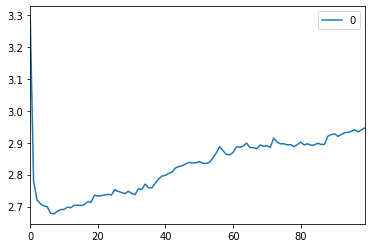

/kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:859: UserWarning: The following variables cannot be serialized: adam, bpe
  warnings.warn(message)


In [7]:
#!g1.1

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

X = sliding_window(preprocessed, 0, max_len)
y = extract_labels(X)

# We crop labels so that they won't leak into our data
X = X[:,:-1]
# We need to one-hot encode our tokens because this is a classification task
y = tf.keras.utils.to_categorical(y, num_classes=bpe.vocab_size())

model = Sequential()
# We subtract one from max length because we cropped our X
model.add(Embedding(bpe.vocab_size(), 100, input_length=max_len-1))
# We could use bidirectional LSTM here
model.add(LSTM(150))
# Let's use softmax to receive probabilities at the end
model.add(Dense(bpe.vocab_size(), activation='softmax'))

adam = Adam(lr=0.01)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(X, y, batch_size=64, epochs=100, verbose=1) # , validation_data=(X_val, y_val))

import pandas as pd

model_loss = pd.DataFrame(history.history["loss"])
model_loss.plot()

model.save('saved_model/lstm_baseline')

800399/800399 [==============================] - 298s 372us/sample - loss: 2.7069 - acc: 0.4742


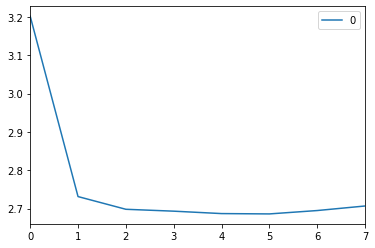

/kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:859: UserWarning: The following variables cannot be serialized: adam, bpe
  warnings.warn(message)


In [6]:
#!g1.1

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

X = sliding_window(preprocessed, 0, max_len)
y = extract_labels(X)

# We crop labels so that they won't leak into our data
X = X[:,:-1]
# We need to one-hot encode our tokens because this is a classification task
y = tf.keras.utils.to_categorical(y, num_classes=bpe.vocab_size())

model = Sequential()
# We subtract one from max length because we cropped our X
model.add(Embedding(bpe.vocab_size(), 100, input_length=max_len-1))
# We could use bidirectional LSTM here
model.add(LSTM(150))
# Let's use softmax to receive probabilities at the end
model.add(Dense(bpe.vocab_size(), activation='softmax'))

adam = Adam(lr=0.01)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(X, y, batch_size=64, epochs=8, verbose=1) # , validation_data=(X_val, y_val))

import pandas as pd

model_loss = pd.DataFrame(history.history["loss"])
model_loss.plot()

model.save('saved_model/lstm_baseline')

In [9]:
#!g1.1
%pip install 'h5py==2.10.0' --force-reinstall

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 2.9 MB 2.3 MB/s 
     |████████████████████████████████| 15.7 MB 58.7 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.0.8 requires typing-extensions<4.0.0.0,>=3.7.4.1; python_version < "3.8", but you have typing-extensions 4.0.0 which is incompatible.
spacy 3.1.1 requires typing-extensions<4.0.0.0,>=3.7.4; python_version < "3.8", but you have typing-extensions 4.0.0 which is incompatible.
moto 1.3.14 requires idna<2.9,>=2.5, but you have idna 2.10 which is incompatible.
mmdet 2.3.0rc0+c6b5ca2 requires Pillow<=6.2.2, but you have pillow 8.4.0 which is incompatible.
kaggle 1.5.8 requires urllib3<1.25,>=1.21.1

In [26]:
#!g1.1

import tensorflow as tf

def preprocess(text):
    return np.expand_dims(sliding_window(bpe.encode(text, output_type=yttm.OutputType.ID), 0, 19)[-1], axis=0)

model = tf.keras.models.load_model('saved_model/lstm_baseline')

def try_model(text):
    result = model.predict(preprocess(text))
    for token in reversed(np.argsort(result[0])[-3:]):
        print(f"Token '{bpe.decode([[token]])[0]}' with probability {result[0][token]}")
    print()

# Jun 15 02:04:59 combo sshd(pam_unix)[20882]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=220-135-151-1.hinet-ip.hinet.net  user=root
try_model("Jun 15 02:04:59 combo sshd(pam_unix)[20882]: authentication")

# 2015-07-29 19:21:38,626 - WARN  [RecvWorker:188978561024:QuorumCnxManager$RecvWorker@762] - Connection broken for id 188978561024, my id = 2, error = 
try_model("2015-07-29 19:21:38,626 - WARN  [RecvWorker:188978561024:QuorumCnxManager$RecvWorker@762] - Connection broken for id")
try_model("2015-07-29 19:21:38,626 - WARN  [RecvWorker:188978561024:QuorumCnxManager$")
try_model("2015-07-29 19:21:38,626 - WARN")
try_model("2015-07-29 19:21:38,626 -")

Token 'failure;' with probability 0.9999998807907104
Token 'failed' with probability 1.210655824479545e-07
Token 'in' with probability 5.177138007184112e-08

Token '188978561024,' with probability 0.9989031553268433
Token '.' with probability 0.0006235343753360212
Token ']' with probability 0.00012456234253477305

Token 'tas' with probability 0.27553802728652954
Token 'ir' with probability 0.05748680979013443
Token '-' with probability 0.048808448016643524

Token '[SendWorker:188978561024:QuorumCnxManager$SendWorker@679]' with probability 0.48188748955726624
Token '[RecvWorker:188978561024:QuorumCnxManager$RecvWorker@762]' with probability 0.21062910556793213
Token '[RecvWorker:188978561024:QuorumCnxManager$RecvWorker@765]' with probability 0.1450730711221695

Token 'WARN' with probability 0.9543246030807495
Token 'INFO' with probability 0.03835880383849144
Token '-' with probability 0.0030226341914385557



/kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:859: UserWarning: The following variables cannot be serialized: bpe
  warnings.warn(message)
